**TITLE - UNLOCKING CONCRETE STRENGTH PATTERNS THROUGH EXPLORATORY DATA ANALYSIS**

---



**BY - MOHAMMED JAFFER ABBAS**

**DATE - JULY 2025**

**FIELD - CIVIL ENGINEERING**


---



**PROJECT CONTEXT**

Concrete is one of the most widely used construction materials in the world.
Its strength is influenced by various components such as cement, water, aggregates, and additives, as well as the age of the concrete. Understanding how these ingredients affect compressive strength is essential for ensuring structural safety, durability, and cost-effectiveness.

This project applies Exploratory Data Analysis (EDA) techniques to a real-world dataset of concrete mixtures to uncover:
*   Relationships between input materials and strength
*   Statistical trends and distribution patterns
*   Potential outliers and anomalies in the data
*   Engineering insights to improve mix design



---



**OBJECTIVE**

To explore and analyze the factors influencing **concrete compressive strength** using data visualization and statistical analysis, and to derive insights that can assist in civil engineering decision-making and concrete optimization.


---



**STEP-1 - IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* pandas as pd

  Imports the Pandas library and gives it the nickname pd.
  
  Pandas helps us load, store, and manipulate tabular data (like Excel sheets or CSV files).


* seaborn as sns

  Imports Seaborn, a powerful visualization library built on top of Matplotlib,   nicknamed sns.

  It’s great for making attractive, informative statistical plots.


* matplotlib.pyplot as plt

  Imports the basic plotting functions from Matplotlib, giving it the nickname plt.

  We use this to customize and display plots.

**LOADING THE DATASET**

In [7]:
df = pd.read_excel("Concrete_Data.xls")

* pd.read_excel() reads an Excel file and loads it into a Pandas DataFrame called df.

* The argument "Concrete_Data.xls" is the filename (make sure this file is in your working folder).

**RENAMING COLUMNS**

In [8]:
df.columns = ['Cement','Slag','FlyAsh','Water','Superplasticizer','CoarseAgg','FineAgg','Age','Strength']


* The dataset’s columns may have default or unclear names.

* This line renames the columns for clarity using a Python list.

* Each name corresponds to a material or property in concrete data.


**DISPLAYING FIRST FEW ROWS**

In [9]:
df.head()

,Cement,Slag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075




* .head() shows the first 5 rows of the DataFrame by default.
* This helps you check the data loaded correctly and gives a sneak peek of the data.



**CHECKING DATA TYPES AND MISSING VALUES**

In [10]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAgg         1030 non-null   float64
 6   FineAgg           1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None
            Cement         Slag       FlyAsh        Water  Superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.165631    73.895485    54.187136   181.566359          6.203112   
std     104.507142    86.279104    63.996469    21.355567          5.973492   
min  



* df.info() prints:
  
    *   Number of rows/columns
    *   Data types for each column (e.g., float, int)
    *   Number of non-null entries (checks for missing data)


* df.describe() provides statistical summaries for numeric columns, including:
    *   Count, mean, std (standard deviation)
    *   Min, 25%, 50%, 75% percentiles, max

* df.isnull().sum() checks how many missing (null) values exist per column.




**PLOTTING DISTRIBUTION OF EACH FEATURE**

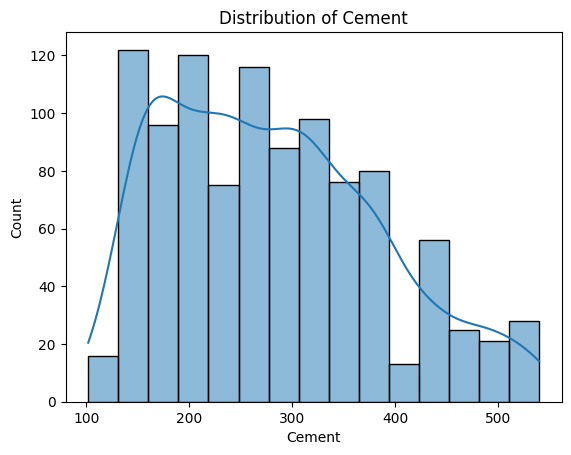

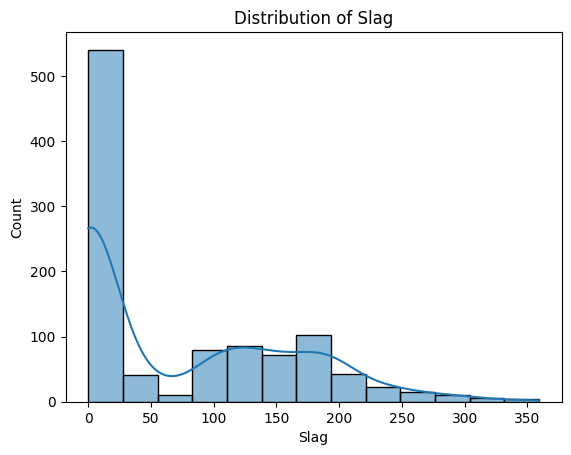

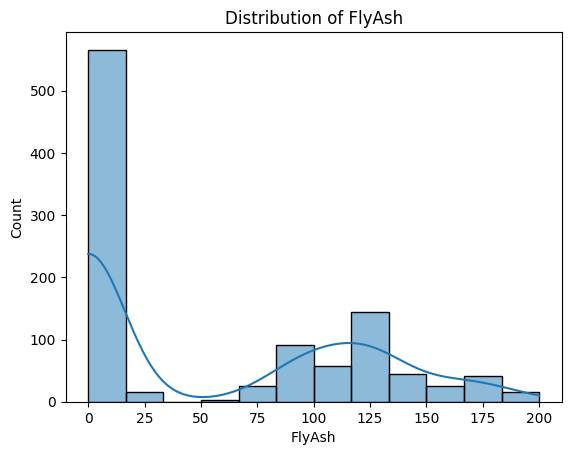

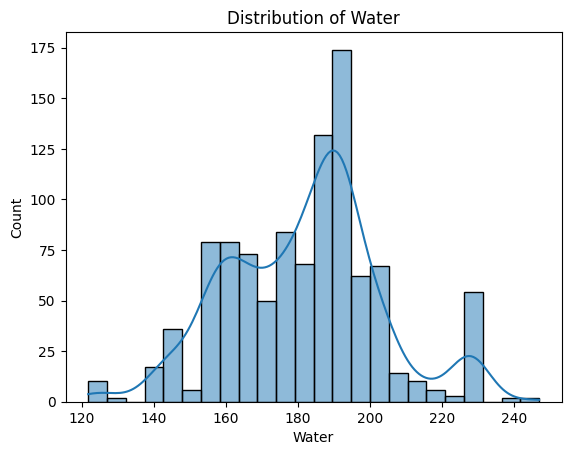

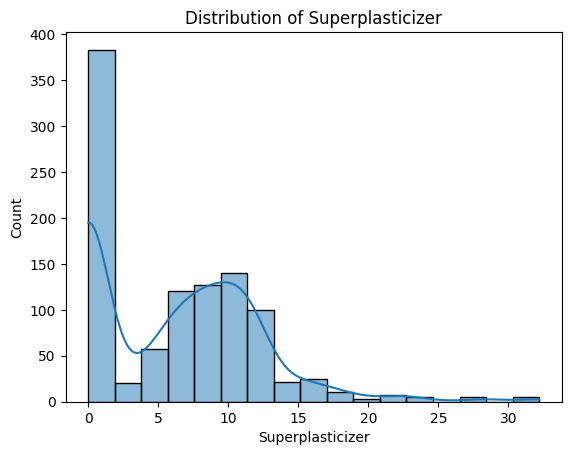

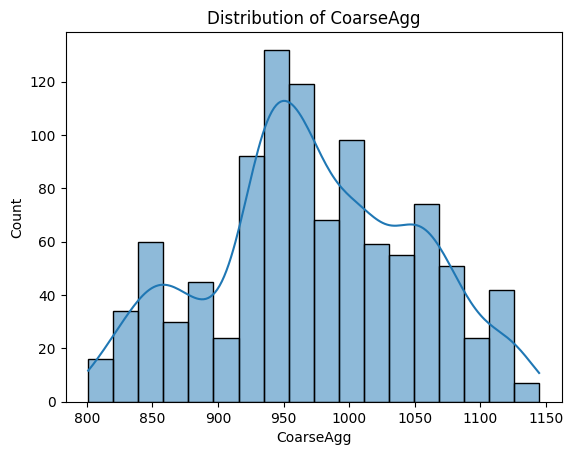

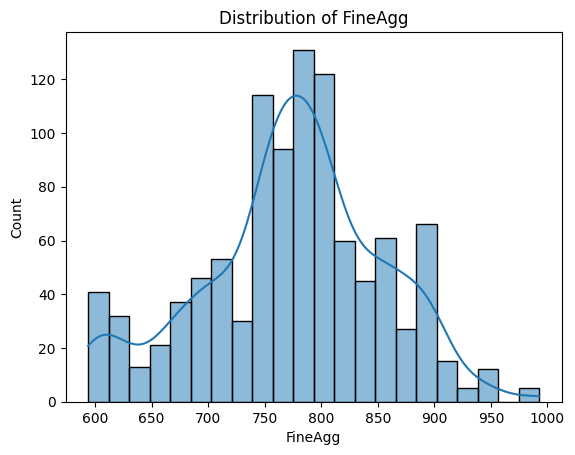

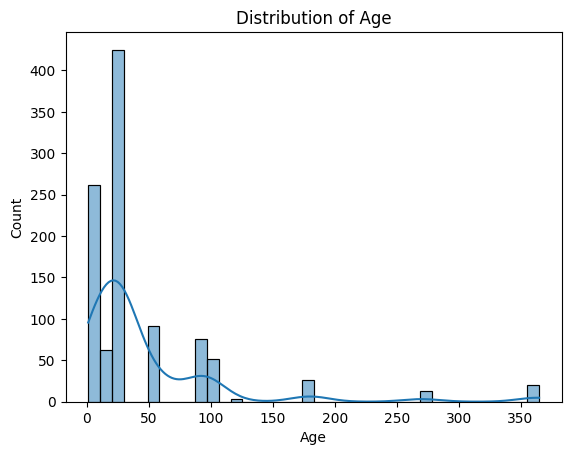

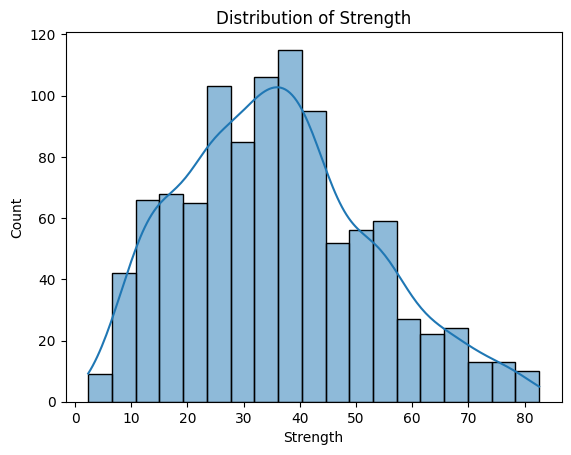

In [11]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



*   for col in df.columns: starts a loop over all columns in the DataFrame.
*   sns.histplot(df[col], kde=True) plots a histogram of the data in column col, with a Kernel Density Estimate (KDE) curve overlaid to show a smooth distribution.
*   plt.title() adds a title for clarity.
*   plt.show() displays the plot before moving to the next column.





**CREATING A CORRELATION MATRIX AND HEATMAP**

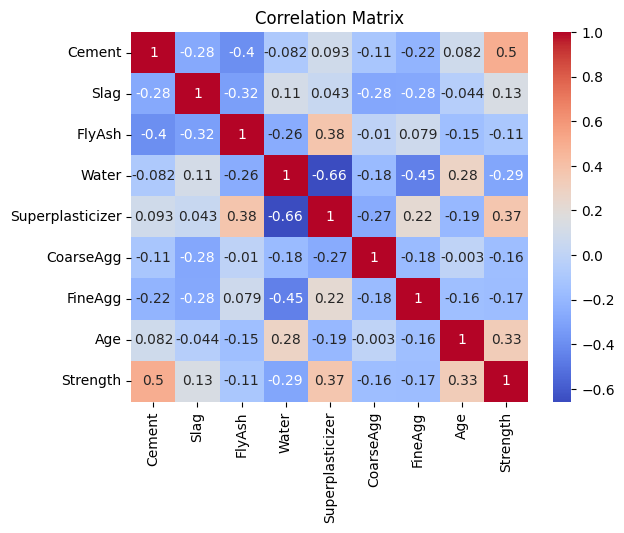

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


*   df.corr() calculates the correlation coefficients between every pair of columns, returning a matrix.
*   sns.heatmap(corr, annot=True, cmap='coolwarm') creates a colored grid (heatmap):
    *   annot=True writes correlation values on cells
    *   cmap='coolwarm' colors cells from blue (negative correlation) to red (positive)
*   plt.title() adds the title, and plt.show() displays the heatmap

**PAIRWISE SCATTER PLOTS**

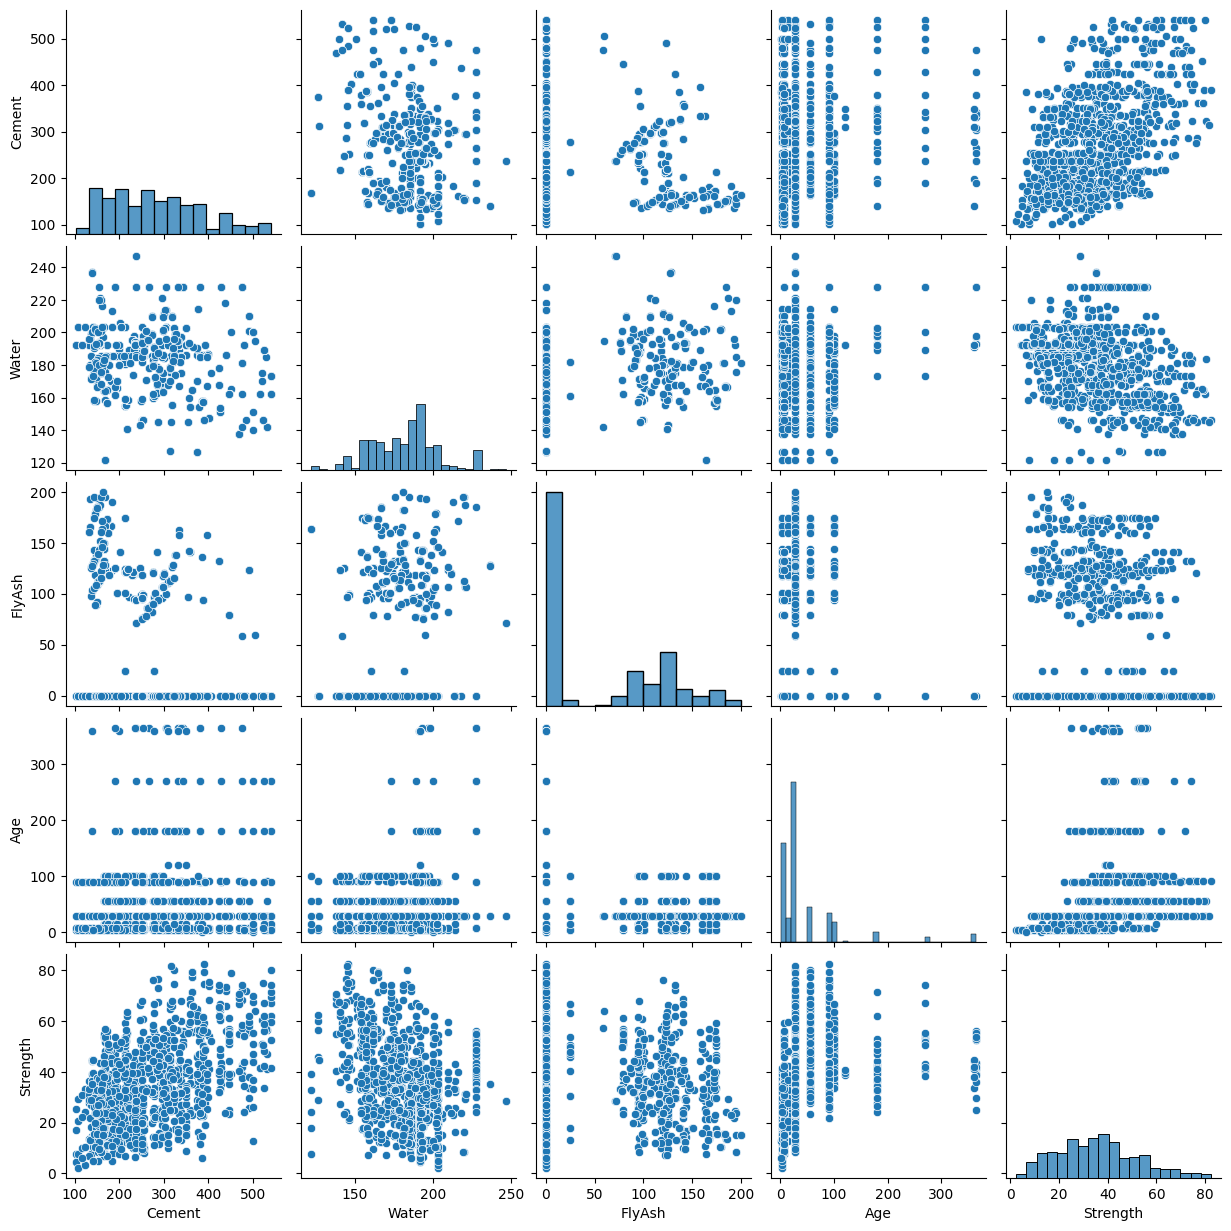

In [13]:
sns.pairplot(df, vars=['Cement', 'Water', 'FlyAsh', 'Age', 'Strength'])


*   sns.pairplot() draws scatter plots between every pair of the selected variables to visually check relationships.
*   vars=[...] specifies which columns to include in the pair plot.
*   Useful for spotting linear or nonlinear patterns and outliers.


**BOXPLOTS FOR OUTLIER DETECTION**

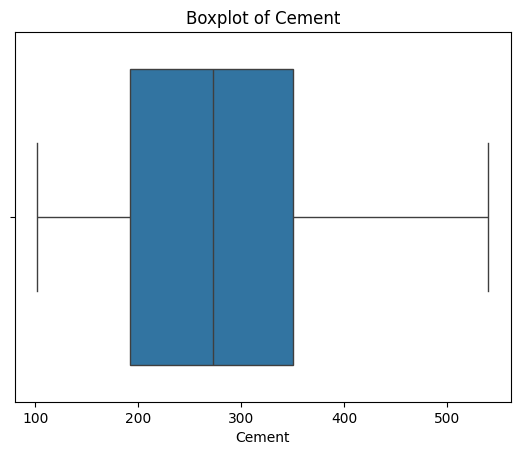

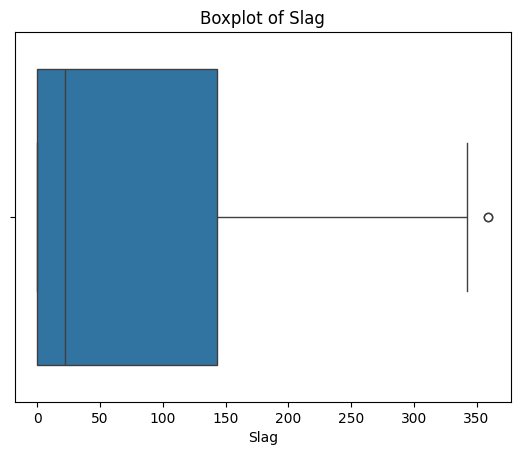

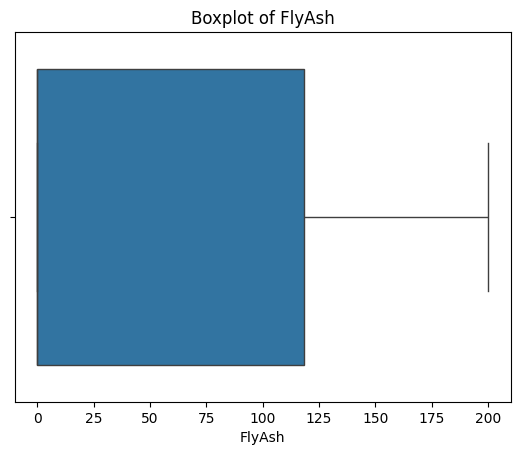

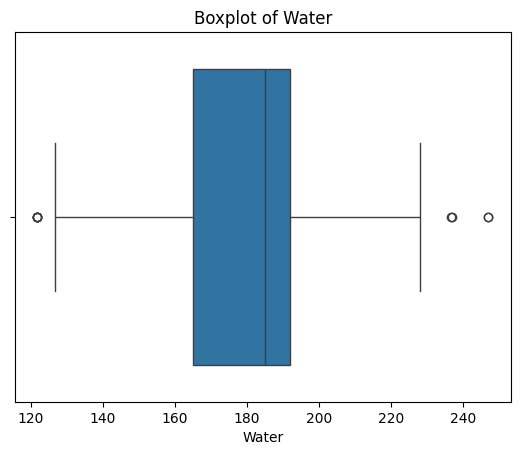

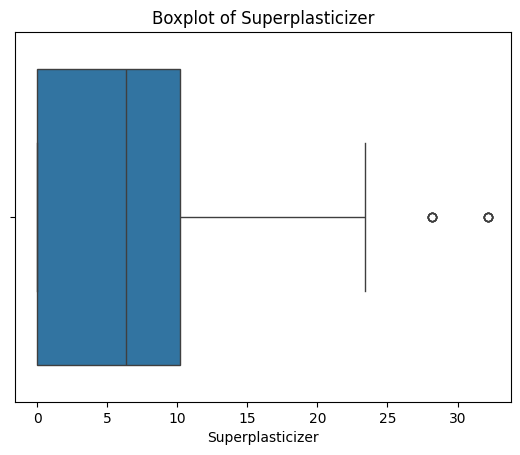

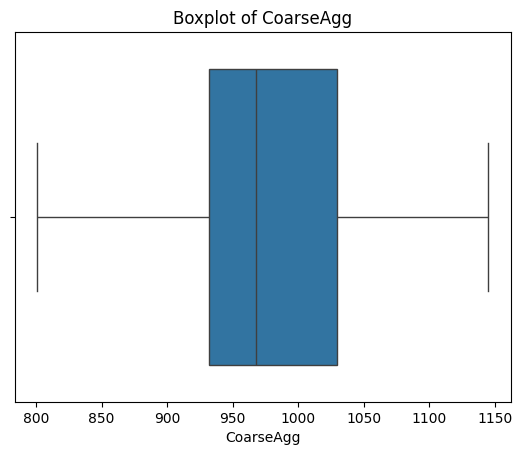

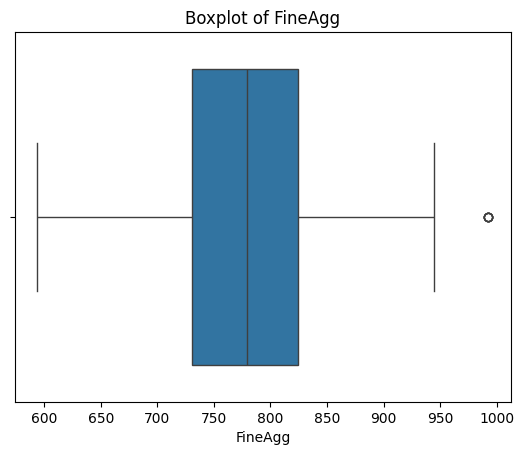

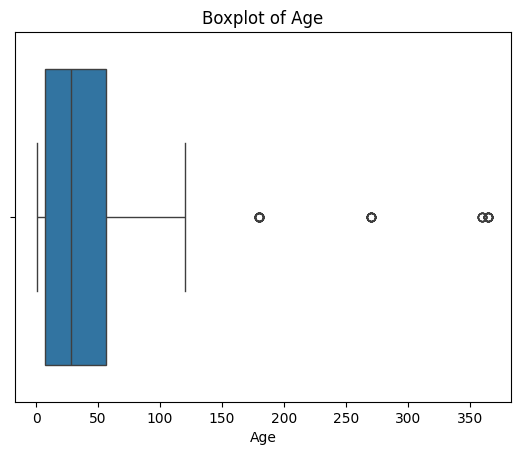

In [14]:
for col in df.columns[:-1]:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



*   Loops through all columns except the last one (usually the target variable, Strength).
*   sns.boxplot() creates a boxplot that visualizes:
   *   Median (line inside the box)
   *   Interquartile range (box)
   *   Whiskers (range excluding outliers)
   *   Outliers (dots outside whiskers)
*   Helps detect extreme values.


** FEATURE ENGINEERING: WATER-CEMENT RATIO**

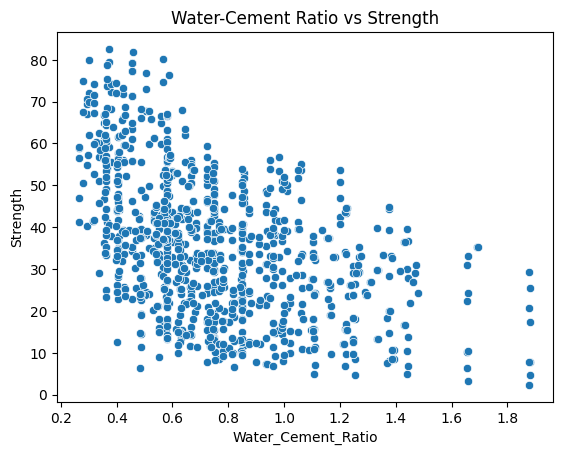

In [15]:
df['Water_Cement_Ratio'] = df['Water'] / df['Cement']
sns.scatterplot(x='Water_Cement_Ratio', y='Strength', data=df)
plt.title("Water-Cement Ratio vs Strength")
plt.show()


*   Creates a new column 'Water_Cement_Ratio' by dividing water content by cement content.
*   Engineers know this ratio influences strength, so this feature may explain strength variation better.
*   sns.scatterplot() visualizes the relationship between this new ratio and concrete strength.


---



**CONCLUSION**

In this project, we performed Exploratory Data Analysis (EDA) on a concrete compressive strength dataset. The goal was to understand how different mix components and age influence the strength of concrete.

🧩 **Key Insights**:


*   **Cement and Age** show strong positive correlation with compressive strength — more cement and longer curing time generally improve strength.
*   **Water and Water-Cement Ratio** have a **negative effect** on strength when too high, confirming known civil engineering behavior.
*   **Superplasticizer** can help improve workability without sacrificing strength, but excessive use may not be beneficial.
*   There are some **outliers** in component values that may represent experimental mixes or data issues.

🔧 **Engineering Implications**:

*   Mix design can be optimized using this analysis to **reduce cost and increase strength**.
*   Understanding variable relationships allows for better **material selection** and **quality control**.
*  This project lays the foundation for predictive modeling (e.g., using linear regression or machine learning) to forecast strength from mix inputs.

---


